# Extraction and cleanup of the refugee data

In [54]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle
from tqdm import tqdm
import wikipedia
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import shapely.wkt

In [2]:
CONFLICT_DATA_PATH = "ged171.csv"
raw_conflict_df = pd.read_csv(CONFLICT_DATA_PATH)
display(raw_conflict_df.head(5))

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,gwnoa,...,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,low,high
0,4,2010,1,1,230,Yemen (North Yemen):Government,459,Government of Yemen (North Yemen) - AQAP,123,678.0,...,1,2010-09-25,2010-09-25,2,0,0,0,2,2,2
1,5,2011,1,3,715,Government of Yemen (North Yemen) - Civilians,1182,Government of Yemen (North Yemen) - Civilians,123,678.0,...,1,2011-02-19,2011-02-19,0,0,0,0,0,0,2
2,6,2011,1,1,230,Yemen (North Yemen):Government,459,Government of Yemen (North Yemen) - AQAP,123,678.0,...,1,2011-04-16,2011-04-16,0,0,0,0,0,0,1
3,7,2012,1,1,230,Yemen (North Yemen):Government,459,Government of Yemen (North Yemen) - AQAP,123,678.0,...,1,2012-06-04,2012-06-04,4,1,0,0,5,5,5
4,10,2012,1,1,230,Yemen (North Yemen):Government,459,Government of Yemen (North Yemen) - AQAP,123,678.0,...,1,2012-12-09,2012-12-09,0,4,1,0,5,5,5


In [3]:
for year in raw_conflict_df.year.unique():
    for conflict_new_id in raw_conflict_df[raw_conflict_df.year == year].conflict_new_id.unique():
        subdf = raw_conflict_df[(raw_conflict_df.year == year) & (raw_conflict_df.year == year)]

In [4]:
print(raw_conflict_df.columns)

Index(['id', 'year', 'active_year', 'type_of_violence', 'conflict_new_id',
       'conflict_name', 'dyad_new_id', 'dyad_name', 'side_a_new_id', 'gwnoa',
       'side_a', 'side_b_new_id', 'gwnob', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates', 'adm_1', 'adm_2',
       'latitude', 'longitude', 'geom_wkt', 'priogrid_gid', 'country',
       'country_id', 'region', 'event_clarity', 'date_prec', 'date_start',
       'date_end', 'deaths_a', 'deaths_b', 'deaths_civilians',
       'deaths_unknown', 'best', 'low', 'high'],
      dtype='object')


In [26]:
# TODO: explain why we keep what
KEPT_COLUMNS= ['year', 'type_of_violence', 'conflict_new_id',
       'conflict_name', 'side_a_new_id', 'gwnoa',
       'side_a', 'gwnob', 'side_b_new_id','side_b',
       'where_prec', 'where_coordinates', 'adm_1', 'adm_2',
       'latitude', 'longitude', 'geom_wkt','country',
       'country_id','date_start', 'deaths_a', 'deaths_b',
       'deaths_civilians',
       'deaths_unknown', 'best'] 

In [27]:
conflict_df = raw_conflict_df[KEPT_COLUMNS]

In [28]:
conflict_df = conflict_df.replace(to_replace="-[0-9]{2}-[0-9]{2}", value="", regex=True)

In [29]:
conflict_df.head(5)

,year,type_of_violence,conflict_new_id,conflict_name,side_a_new_id,gwnoa,side_a,gwnob,side_b_new_id,side_b,...,longitude,geom_wkt,country,country_id,date_start,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
0,2010,1,230,Yemen (North Yemen):Government,123,678.0,Government of Yemen (North Yemen),NaN,881,AQAP,...,44.206667,POINT (44.206667 15.354722),Yemen (North Yemen),678,2010,2,0,0,0,2
1,2011,3,715,Government of Yemen (North Yemen) - Civilians,123,678.0,Government of Yemen (North Yemen),NaN,1,Civilians,...,45.036667,POINT (45.036667 12.779444),Yemen (North Yemen),678,2011,0,0,0,0,0
2,2011,1,230,Yemen (North Yemen):Government,123,678.0,Government of Yemen (North Yemen),NaN,881,AQAP,...,46.141765,POINT (46.141765 13.786202),Yemen (North Yemen),678,2011,0,0,0,0,0
3,2012,1,230,Yemen (North Yemen):Government,123,678.0,Government of Yemen (North Yemen),NaN,881,AQAP,...,46.141765,POINT (46.141765 13.786202),Yemen (North Yemen),678,2012,4,1,0,0,5
4,2012,1,230,Yemen (North Yemen):Government,123,678.0,Government of Yemen (North Yemen),NaN,881,AQAP,...,45.300000,POINT (45.300000 15.616667),Yemen (North Yemen),678,2012,0,4,1,0,5


In [37]:
#test_gpd = gpd.GeoSeries(conflict_df.geom_wkt)

In [55]:
geometry = conflict_df['geom_wkt'].map(shapely.wkt.loads)
conflict_df = conflict_df.drop('geom_wkt', axis=1)
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(conflict_df, crs=crs, geometry=geometry)


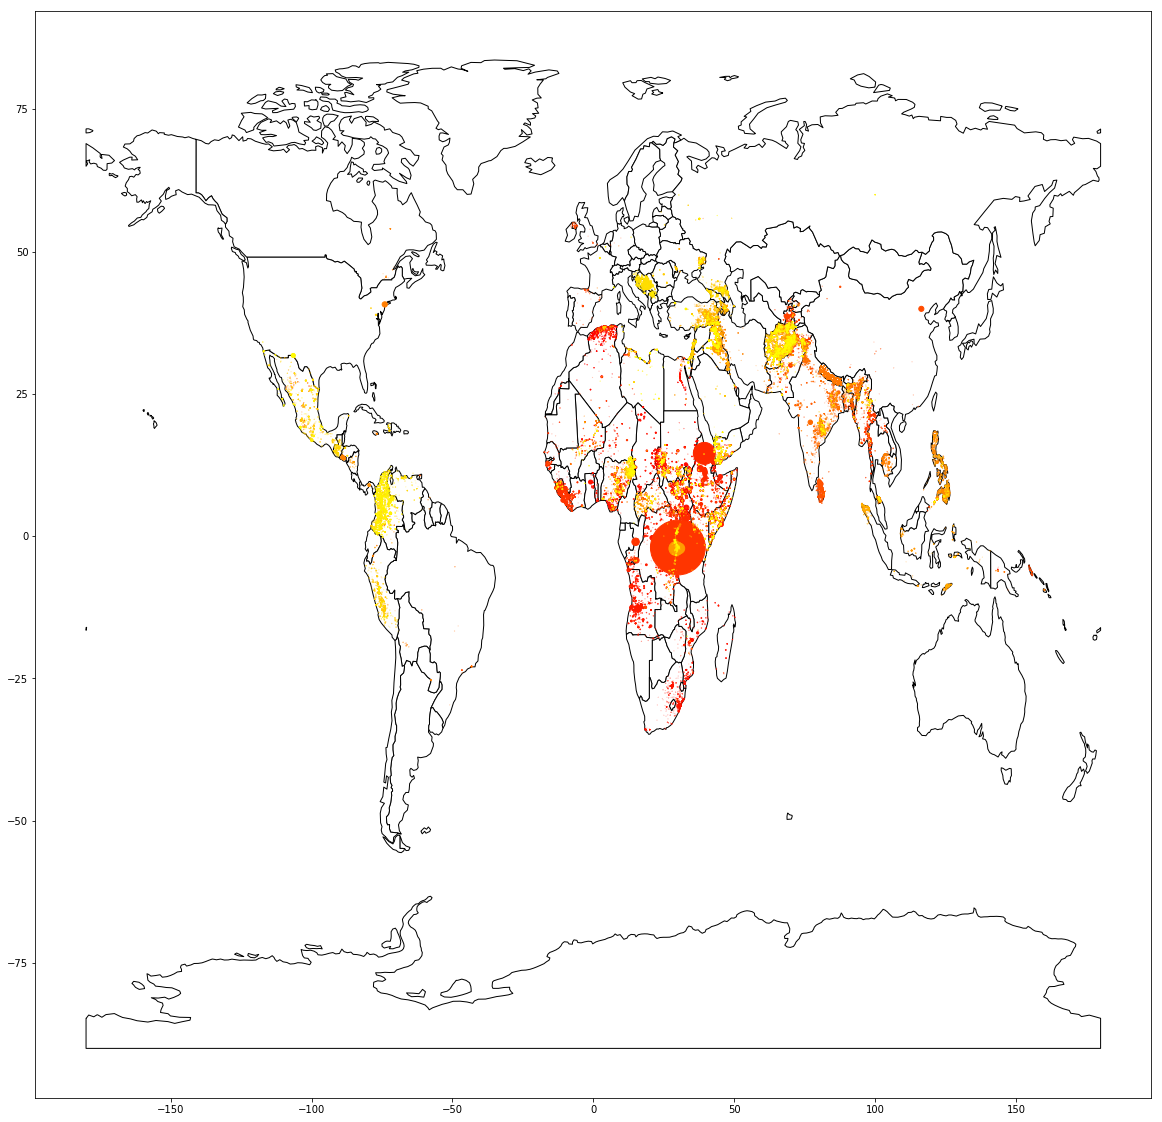

In [83]:
#for row in list(gdf.index.values):
#    print(gdf.get_value(row,"best"))
#    gdf[row].plot(s=gdf.get_value(row, "best"))
#    break
fig, ax = plt.subplots(figsize=(20,20))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, figsize=(20,20), markersize=(gdf.loc[:, "best"]/100), cmap="autumn")
    
plt.show()